In [117]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly.subplots import make_subplots

from wordcloud import WordCloud

In [2]:
df = pd.read_csv('../data/info_data_job_market_research.csv')

In [ ]:
df.drop(columns = ['Unnamed: 0'], inplace=True)

## Gráfica palabras usadas Puesto trabajo:

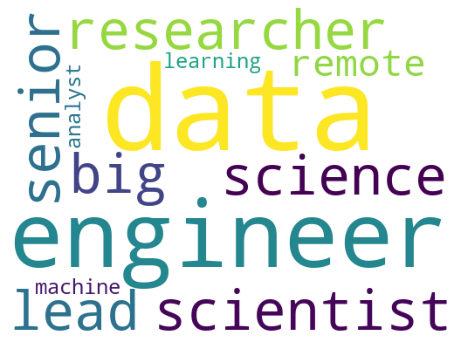

In [3]:
puesto_ds = df[df['Tipo puesto']=='Data Scientist']

puesto_ds = pd.Series(' '.join(puesto_ds['Puesto ofertado']).lower().split()).value_counts()[:30]


rem_word_puesto = ['-','and','&','de','in','for']

for i in rem_word_puesto:
    if i in puesto_ds:
        puesto_ds = puesto_ds.drop(i)


puesto_ds = puesto_ds[:12]

puesto_ds.rename('Suma', inplace=True)

df_puesto_ds = pd.DataFrame(puesto_ds)

df_puesto_ds.reset_index(inplace=True)

df_puesto_ds.rename(columns = {'index':'Palabras en DA'}, inplace=True)

plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(df_puesto_ds['Palabras en DA']))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph_puesto_ds.png')

plt.show()

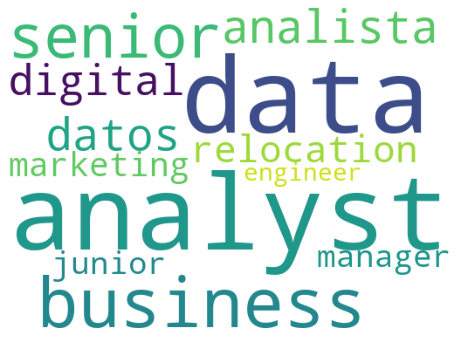

In [26]:
puesto_da = df[df['Tipo puesto']=='Data Analyst']

puesto_da = pd.Series(' '.join(puesto_da['Puesto ofertado']).lower().split()).value_counts()[:30]

 
rem_word_puesto_da = ['-', 'and', 'analyst,', 'de', ',', '&', '–', 'provided)', '/', 'it', '(bangkok', 'based,']

for i in rem_word_puesto_da:
    if i in puesto_da:
        puesto_da = puesto_da.drop(i)


puesto_da = puesto_da[:12]

puesto_da.rename('Suma', inplace=True)

df_puesto_da = pd.DataFrame(puesto_da)

df_puesto_da.reset_index(inplace=True)

df_puesto_da.rename(columns = {'index':'Palabras en DA'}, inplace=True)

plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(df_puesto_da['Palabras en DA']))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph_puesto_da.png')

plt.show()

## Gráfico 2: Duración de publicaciones activas

In [66]:
diasact_da = df[df['Tipo puesto']=='Data Analyst']

diasact_da = diasact_da['Días activos'].copy()

lista_dias = ['segundo', 'segundos', 'minuto', 'minutos', 'hora', 'horas', 'día', 'días']

for i in lista_dias:
    diasact_da[diasact_da.str.contains(i)] = '03-08-21'
    
diasact_da[diasact_da.str.contains(' 1 semana')] = '03-01-21'
diasact_da[diasact_da.str.contains(' 2 semanas')] = '02-22-21'
diasact_da[diasact_da.str.contains(' 3 semanas')] = '02-15-21'
diasact_da[diasact_da.str.contains(' 4 semanas')] = '02-08-21'
diasact_da[diasact_da.str.contains(' 1 mes')] = '02-01-21'
diasact_da[diasact_da.str.contains(' 2 meses')] = '01-25-21'
diasact_da[diasact_da.str.contains(' 3 meses')] = '01-18-21'
diasact_da[diasact_da.str.contains(' 4 meses')] = '01-11-21'
diasact_da[diasact_da.str.contains(' 5 meses')] = '01-04-21'

diasact_da = diasact_da.value_counts()

diasact_da.drop('no_data', inplace=True)

df_diasact_da = pd.DataFrame(diasact_da)

df_diasact_da.reset_index(inplace=True)

df_diasact_da.rename(columns={'index': 'Fechas'}, inplace = True)

df_diasact_da['Fechas'] = pd.to_datetime(df_diasact_da['Fechas'])

df_diasact_da.sort_values('Fechas', ascending=True, inplace=True)

fig = px.bar(df_diasact_da, x='Fechas', y='Días activos',
             template = "presentation",
            labels={'Fechas':'Semanas',
                    'Días activos':'Nº puestos activos'})

fig.update_traces(marker=dict(color='green'))
fig.update_layout(title_text='Nº publicaciones activas D. Analyst por semanas')
fig['layout']['xaxis']['autorange'] = "reversed"
fig.show()

In [72]:
diasact_ds = df[df['Tipo puesto']=='Data Analyst']

diasact_ds = diasact_ds['Días activos'].copy()

lista_dias = ['segundo', 'segundos', 'minuto', 'minutos', 'hora', 'horas', 'día', 'días']

for i in lista_dias:
    diasact_ds[diasact_ds.str.contains(i)] = '03-08-21'
    
diasact_ds[diasact_ds.str.contains(' 1 semana')] = '03-01-21'
diasact_ds[diasact_ds.str.contains(' 2 semanas')] = '02-22-21'
diasact_ds[diasact_ds.str.contains(' 3 semanas')] = '02-15-21'
diasact_ds[diasact_ds.str.contains(' 4 semanas')] = '02-08-21'
diasact_ds[diasact_ds.str.contains(' 1 mes')] = '02-01-21'
diasact_ds[diasact_ds.str.contains(' 2 meses')] = '01-25-21'
diasact_ds[diasact_ds.str.contains(' 3 meses')] = '01-18-21'
diasact_ds[diasact_ds.str.contains(' 4 meses')] = '01-11-21'
diasact_ds[diasact_ds.str.contains(' 5 meses')] = '01-04-21'

diasact_ds = diasact_ds.value_counts()

diasact_ds.drop('no_data', inplace=True)

df_diasact_ds = pd.DataFrame(diasact_ds)

df_diasact_ds.reset_index(inplace=True)

df_diasact_ds.rename(columns={'index': 'Fechas'}, inplace = True)

df_diasact_ds['Fechas'] = pd.to_datetime(df_diasact_ds['Fechas'])

df_diasact_ds.sort_values('Fechas', ascending=True, inplace=True)

fig = px.bar(df_diasact_ds, x='Fechas', y='Días activos',
             template = "presentation",
            labels={'Fechas':'Semanas',
                    'Días activos':'Nº puestos activos'})

fig.update_traces(marker=dict(color='rgba(48,45,255)'))
fig.update_layout(title_text='Nº publicaciones activas D. Scientist por semanas')
fig['layout']['xaxis']['autorange'] = "reversed"
fig.show()

### Gráfico 3: Contar nº de puestos en las ciudades

In [266]:
df_ub_da = df[df['Tipo puesto']=='Data Analyst']
df_ub_da = df_ub_da['Ubicación'].copy()
df_ub_da_top = df_ub_da.value_counts()[:6]
df_ub_da_other = df_ub_da.value_counts()[7:].count()
df_ub_da_other = pd.Series([df_ub_da_other], index=['Otras ciudades'])
df_ub_da_ok = df_ub_da_top.append(df_ub_da_other)
df_ub_da_ok.rename('Data Analyst', inplace=True)
df_ub_da_ok = pd.DataFrame(df_ub_da_ok)

df_ub_ds = df[df['Tipo puesto']=='Data Scientist']
df_ub_ds = df_ub_ds['Ubicación'].copy()
df_ub_ds_top = df_ub_ds.value_counts()[:6]
df_ub_ds_other = df_ub_ds.value_counts()[7:].count()
df_ub_ds_other = pd.Series([df_ub_ds_other], index=['Otras ciudades'])
df_ub_ds_ok = df_ub_ds_top.append(df_ub_ds_other)
df_ub_ds_ok.rename('Data Scientist', inplace=True)
df_ub_ds_ok = pd.DataFrame(df_ub_ds_ok)

result = pd.concat([df_ub_da_ok, df_ub_ds_ok], axis = 1)

result.sort_values(by = ['Data Analyst'], ascending=False)

labels = list(result.index)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=labels,
    y=result['Data Analyst'],
    name='Data Analyst',
    marker_color='green'
))
fig.add_trace(go.Bar(
    x=labels,
    y=result['Data Scientist'],
    name='Data Scientist',
    marker_color='rgba(48,45,255)'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45, template = "plotly_white")
fig.show()

### Gráfico Nº de solicitudes:

In [184]:
sol_da = df[df['Tipo puesto']=='Data Analyst']
sol_ds = df[df['Tipo puesto']=='Data Scientist']

mask_sol_da = sol_da.groupby(['Nombre empresa'])['Nº Solicitudes'].sum()
mask_sol_da = mask_sol_da.sort_values(ascending=False)[:10]
mask_sol_da = pd.DataFrame(mask_sol_da)
mask_sol_da.reset_index(inplace=True)

mask_sol_ds = sol_ds.groupby(['Nombre empresa'])['Nº Solicitudes'].sum()
mask_sol_ds = mask_sol_ds.sort_values(ascending=False)[:10]
mask_sol_ds = pd.DataFrame(mask_sol_ds)
mask_sol_ds.reset_index(inplace=True)

fig = go.Figure(data=[
    go.Bar(name='Data Analysis', x=mask_sol_da['Nº Solicitudes'], y=mask_sol_da['Nombre empresa'], orientation='h'),
    go.Bar(name='Data Scientist', x=mask_sol_ds['Nº Solicitudes'], y=mask_sol_ds['Nombre empresa'], orientation='h')
])

# Change the bar mode
fig.update_layout(barmode='group', xaxis_tickangle=-45)

In [185]:
fig = go.Figure(data=[
    go.Bar(name='Data Analysis', x=mask_sol_da['Nº Solicitudes'], y=mask_sol_da['Nombre empresa'], orientation='h'),
    go.Bar(name='Data Scientist', x=mask_sol_ds['Nº Solicitudes'], y=mask_sol_ds['Nombre empresa'], orientation='h')
])

# Change the bar mode
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

## Gráfico por tipo de experiencia:

In [205]:
nexp_da = df[df['Tipo puesto']=='Data Analyst']
nexp_da = nexp_da['Nivel experiencia'].value_counts()
nexp_da = pd.DataFrame(nexp_da)
nexp_da.drop('no_data', inplace=True)
nexp_da

nexp_ds = df[df['Tipo puesto']=='Data Analyst']
nexp_ds = nexp_ds['Nivel experiencia'].value_counts()
nexp_ds = pd.DataFrame(nexp_da)
nexp_ds

labels1 = list(nexp_da.index)
labels2 = list(nexp_ds.index)

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=labels1, values=nexp_da['Nivel experiencia']),
              1, 1)

fig.add_trace(go.Pie(labels=labels2, values=nexp_ds['Nivel experiencia']),
              1, 2)

fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Nivel experiencia requerida",

    annotations=[dict(text='DA', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='DS', x=0.82, y=0.5, font_size=20, showarrow=False)])
fig.show()

### Gráfico por tipo de jornada

In [291]:
jornada_da = df[df['Tipo puesto']=='Data Analyst']
jornada_da = jornada_da['Tipo jornada'].value_counts()
jornada_da = pd.DataFrame(jornada_da)

jornada_ds = df[df['Tipo puesto']=='Data Scientist']
jornada_ds = jornada_ds['Tipo jornada'].value_counts()
jornada_ds = pd.DataFrame(jornada_ds)
jornada_ds.drop('no_data', inplace=True)

labels1 = list(jornada_da.index)
labels2 = list(jornada_ds.index)

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=labels1, values=jornada_da['Tipo jornada']),
              1, 1)

fig.add_trace(go.Pie(labels=labels2, values=jornada_ds['Tipo jornada']),
              1, 2)

fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Tipo jornada por puesto",

    annotations=[dict(text='DA', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='DS', x=0.82, y=0.5, font_size=20, showarrow=False)])
fig.show()

### Palabras más importantes en la descripciones

In [337]:
desc_da = df[df['Tipo puesto']=='Data Analyst']
desc_da = pd.Series(' '.join(desc_da["Descripción"]).lower().split()).value_counts()[:100]
desc_da.rename('Suma palabras', inplace=True)
lista_desc_da = list(desc_da.index)
print(lista_desc_da)
lista_desc_drop = ['and', 'to', 'the', 'de', 'of', 'a', 'in', 'with', 'y', 'for', 'en', 'is', 'la', 'are', 'as', 'on', 'will', 'or', 'be', 'that', 'your', 'an', 'at', 'from', 'con', 'by', 'el', '-', 'all', 'have', 'new', 'nivel', 'para', 'this', 'tipo', 'completa', 'it', 'los', 'product', 'other', 'que', '&', 'del', 'more', 'what', 'their', 'un', 'about', 'can', 'teams', 'within', 'make', 'across', 'las', 'por', 'people', 'through', 'key']

['and', 'to', 'the', 'de', 'of', 'a', 'in', 'with', 'data', 'y', 'our', 'we', 'for', 'you', 'business', 'en', 'is', 'la', 'are', 'as', 'experience', 'on', 'will', 'or', 'work', 'team', 'be', 'that', 'experiencia', 'your', 'an', 'at', 'from', 'working', 'con', 'by', 'sector', 'información', 'skills', 'el', '-', 'funciones', 'all', 'have', 'nivel', 'new', 'para', 'this', 'empleo', 'jornada', 'knowledge', 'tipo', 'completa', 'laborales', 'analyst', 'it', 'ability', 'support', 'los', 'product', 'other', 'marketing', 'analysis', 'software', 'que', '&', 'strong', 'management', 'solutions', 'del', 'analytics', 'role', 'servicios', 'more', 'what', 'their', 'un', 'about', 'development', 'company', 'tools', 'can', 'teams', 'within', 'project', 'requirements', 'digital', 'make', 'across', 'las', 'global', 'technology', 'environment', 'datos', 'people', 'por', 'through', 'key', 'customer', 'tecnología']


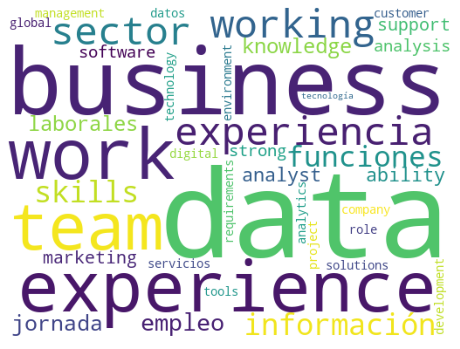

In [338]:
for i in lista_desc_drop:
    if i in desc_da:
        desc_da = desc_da.drop(i)
        
desc_da = pd.DataFrame(desc_da)
desc_da.reset_index(inplace=True)
desc_da.rename(columns = {'index': 'Palabra'}, inplace=True)

plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(desc_da['Palabra']))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph_desc_da.png')

plt.show()

In [341]:
desc_ds = df[df['Tipo puesto']=='Data Scientist']
desc_ds = pd.Series(' '.join(desc_ds["Descripción"]).lower().split()).value_counts()[:100]
desc_ds.rename('Suma palabras', inplace=True)
lista_desc_ds = list(desc_ds.index)
print(lista_desc_ds)
lista_desc_drop_ds = ['and', 'the', 'de', 'to', 'of', 'a', 'in', 'with', 'y', 'en', 'we', 'our', 'for', 'la', 'you', 'is', 'as', 'on', 'or', 'are', 'will', 'be', 'that', 'con', 'an', 'your', 'at', 'have', 'from', 'el', 'para', 'que', 'by', 'tipo', 'los', '-',  'un', 'new', 'this', 'all', 'more', '&', 'what', 'it', 'other', 'del', 'about', 'their', 'las', 'people', 'por', 'o', 'us', 'can', 'part', 'looking', 'una', 'best', 'make', 'como']

['and', 'the', 'de', 'to', 'of', 'a', 'in', 'data', 'with', 'y', 'en', 'we', 'our', 'for', 'la', 'you', 'is', 'experience', 'as', 'on', 'or', 'are', 'will', 'experiencia', 'be', 'that', 'team', 'work', 'con', 'an', 'your', 'at', 'información', 'working', 'have', 'from', 'el', 'para', 'sector', 'business', 'nivel', 'que', 'by', 'funciones', 'knowledge', 'tipo', 'empleo', 'laborales', 'los', '-', 'jornada', 'completa', 'research', 'un', 'new', 'this', 'all', 'learning', 'more', '&', 'software', 'skills', 'what', 'tecnología', 'servicios', 'big', 'development', 'it', 'machine', 'other', 'del', 'about', 'tecnologías', 'their', 'las', 'people', 'por', 'datos', 'solutions', 'technical', 'strong', 'o', 'product', 'cloud', 'design', 'us', 'analytics', 'can', 'science', 'company', 'part', 'looking', 'una', 'ability', 'best', 'make', 'opportunity', 'proyectos', 'como', 'tools']


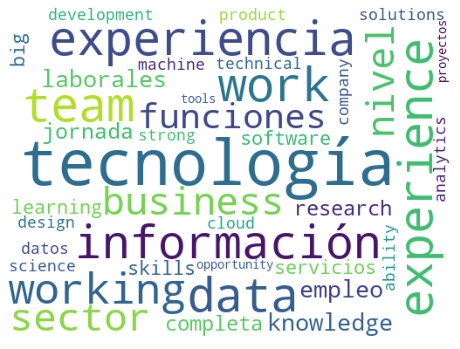

In [342]:
for i in lista_desc_drop_ds:
    if i in desc_ds:
        desc_ds = desc_ds.drop(i)
        
desc_ds = pd.DataFrame(desc_ds)
desc_ds.reset_index(inplace=True)
desc_ds.rename(columns = {'index': 'Palabra'}, inplace=True)

plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(desc_ds['Palabra']))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph_desc_ds.png')

plt.show()